## Packages

In [153]:
import json
import pandas as pd
import os
import sys
import requests
# import gdown
import opendatasets as od

print(sys.executable)
print(os.getcwd())

# 0 - petr4
# 1 - vale3
# 2 - itub4
# df_vale.explode('tags').groupby('tags').count().sort_values('title', ascending=False)


C:\Users\Guilherme\.conda\envs\nlp2\python.exe
C:\Users\Guilherme\Documents\Programming\Python\DataScience\TCC\pipeline


In [154]:
pd

<module 'pandas' from 'C:\\Users\\Guilherme\\.conda\\envs\\nlp2\\lib\\site-packages\\pandas\\__init__.py'>

In [155]:
od

<module 'opendatasets' from 'C:\\Users\\Guilherme\\.conda\\envs\\nlp2\\lib\\site-packages\\opendatasets\\__init__.py'>

## Load data

### [1] PETR4

#### Suno

In [156]:
json_data_path = 'https://raw.githubusercontent.com/guico3lho/DataScience_Assets/main/Datasets/financial_market/suno/suno-petr4.json'

# url = 'https://raw.githubusercontent.com/guico3lho/TCC/main/assets/Datasets/suno/suno-petr4.json?token=GHSAT0AAAAAABYDRQ4ZASOZJOMO2OAKI4MEZAOJOKA'
r = requests.get(json_data_path)
data = r.json()
df_suno_petr_raw = pd.DataFrame(data)
df_suno_petr = df_suno_petr_raw[
    df_suno_petr_raw['tags'].apply(lambda x: 'Vale (VALE3)' not in x and 'Itaú Unibanco (ITUB3/ITUB4)' not in x)]
df_suno_petr = df_suno_petr.rename(columns={'url': 'link'})
df_suno_petr

,topic,title,date,search_date,link,tags
0,Negócios,Petrobras (PETR4) finaliza venda do Polo Peroá...,03/08/2022 13:46,2022-08-04 00:21:19,https://www.suno.com.br/noticias/petrobras-pet...,"[Petrobras (PETR4), 3R Petroleum (RRRP3), Petr..."
1,Economia,Conselheiro da Petrobras (PETR4) sugere congel...,17/06/2022 19:52,2022-08-04 00:21:35,https://www.suno.com.br/noticias/petrobras-pet...,"[Petrobras (PETR4), Arthur Lira, Jair Bolsonar..."
2,Negócios,Radar: MRV (MRVE3) paga dividendos milionários...,20/06/2022 23:05,2022-08-04 00:21:35,https://www.suno.com.br/noticias/radar-petrobr...,"[Ibovespa, Ibovespa, Magazine Luiza (MGLU3), M..."
3,Política,Líder dos caminhoneiros sobre voucher: “Não pr...,22/06/2022 17:24,2022-08-04 00:21:35,https://www.suno.com.br/noticias/lider-caminho...,"[Petrobras (PETR4), combustíveis, diesel, Jair..."
4,Negócios,Petrobras (PETR4): Petroleiros aprovam indicat...,10/07/2022 09:40,2022-08-04 00:21:35,https://www.suno.com.br/noticias/petrobras-pet...,"[Petrobras (PETR4), greves, Petrobras (PETR4),..."
...,...,...,...,...,...,...
1425,Mercado,"Ibovespa fecha em queda de 0,35%, a 104.109,07...",28/07/2020 17:37,2022-05-03 16:22:55,https://www.suno.com.br/noticias/ibovespa-fech...,"[AES Tietê (TIET3/TIET4/TIET11), BNDES, Iboves..."
1426,Negócios,"Petrobras faz pré-pagamento de US$ 3,5 bi em l...",28/07/2020 15:00,2022-05-03 16:22:56,https://www.suno.com.br/noticias/petrobras-pre...,"[PETR3, Petrobras (PETR4)]"
1427,Negócios,Petrobras (PETR4) divulga teaser de venda de p...,28/07/2020 11:26,2022-05-03 16:22:57,https://www.suno.com.br/noticias/petrobras-pet...,"[PETR3, Petrobras (PETR4)]"
1428,Negócios,Agenda do Dia: Petrobras; Yduqs; Oi; AES Tietê...,28/07/2020 09:49,2022-05-03 16:22:57,https://www.suno.com.br/noticias/agenda-do-dia...,"[AES Tietê (TIET3/TIET4/TIET11), agenda do dia..."


In [157]:
df_suno_petr.explode('tags').groupby('tags').count().sort_values('title', ascending=False)

,topic,title,date,search_date,link
tags,,,,,
Petrobras (PETR4),1430,1430,1430,1430,1430
PETR3,298,298,298,298,298
Ibovespa,164,164,164,164,164
Especialistas,157,157,157,157,157
Petróleo,102,102,102,102,102
...,...,...,...,...,...
Mosaico (MOSI3),1,1,1,1,1
Moura Dubeux (MDNE3),1,1,1,1,1
Multilaser (MLAS3),1,1,1,1,1


#### Moneytimes

In [158]:
json_data_path = 'https://raw.githubusercontent.com/guico3lho/DataScience_Assets/main/Datasets/financial_market/moneytimes/moneytimes-petr4.json'

# url = 'https://raw.githubusercontent.com/guico3lho/TCC/main/assets/Datasets/suno/suno-petr4.json?token=GHSAT0AAAAAABYDRQ4ZASOZJOMO2OAKI4MEZAOJOKA'
r = requests.get(json_data_path)
data = r.json()

df_moneytimes_petr_raw = pd.DataFrame(data)

df_moneytimes_petr = df_moneytimes_petr_raw[
    df_moneytimes_petr_raw['tags'].apply(lambda x: 'Vale' not in x and 'Itaú Unibanco' not in x)]
df_moneytimes_petr

,topic,title,date,search_date,link,tags
0,Mercados,Ibovespa dispara hoje por quê? Inflação no Bra...,11/05/2022 - 12:14,2022-05-11 19:03:09,https://www.moneytimes.com.br/ibovespa-dispara...,"[Ações, Alimentos, Ativa Investimentos, B3, Bo..."
1,Combustíveis,"Defasagem do diesel cai para 17% após aumento,...",10/05/2022 - 13:40,2022-05-11 19:03:17,https://www.moneytimes.com.br/defasagem-do-die...,"[Amazonas, Bahia, Combustíveis, Diesel, Estadã..."
2,Carteira Recomendada,"Adeus, Ibovespa: 5 ações do BB Investimentos p...",08/05/2022 - 17:18,2022-05-11 19:03:22,https://www.moneytimes.com.br/adeus-ibovespa-5...,"[Ações, Alpargatas, BB Investimentos, Bradesco..."
3,Política,Setor de etanol não se surpreenderá se após Al...,11/05/2022 - 11:57,2022-05-11 19:03:22,https://www.moneytimes.com.br/setor-de-etanol-...,"[Agro Times, Bento Albuquerque, Etanol, Jair B..."
4,Petróleo,EUA perguntaram se Petrobras poderia aumentar ...,10/05/2022 - 8:23,2022-05-11 19:03:22,https://www.moneytimes.com.br/eua-perguntaram-...,"[Bento Albuquerque, Brasil, Combustíveis, Comm..."
...,...,...,...,...,...,...
6124,George Soros,George Soros volta a comprar ação da Petrobras...,23/11/2016 - 12:22,2022-05-11 21:19:57,https://www.moneytimes.com.br/george-soros-vol...,"[George Soros, Petrobras]"
6125,Comprar ou vender?,"Petrobras deve aumentar gasolina em breve, diz...",02/12/2016 - 18:32,2022-05-11 21:19:57,https://www.moneytimes.com.br/petrobras-deve-a...,"[Comprar ou vender?, Itaú BBA, Opep, Petrobras]"
6126,Comprar ou vender?,XP recoloca Petrobras em carteira recomendada,21/11/2016 - 19:55,2022-05-11 21:20:00,https://www.moneytimes.com.br/xp-recoloca-petr...,"[Comprar ou vender?, Petrobras, XP Investimentos]"
6127,Benndorf,Petrobras: Dia é decisivo para tendência de al...,01/12/2016 - 11:59,2022-05-11 21:20:00,https://www.moneytimes.com.br/petrobras-dia-e-...,"[Benndorf, Bolsa, Comprar ou vender?, Petrobras]"


In [159]:
df_moneytimes_petr.explode('tags').groupby('tags').count().sort_values('title', ascending=False)

,topic,title,date,search_date,link
tags,,,,,
Petrobras,4848,4848,4848,4848,4848
Empresas,2913,2913,2913,2913,2913
Petróleo,1863,1863,1863,1863,1863
Reuters,1578,1578,1578,1578,1578
Combustíveis,1014,1014,1014,1014,1014
...,...,...,...,...,...
Blockchain,1,1,1,1,1
Inter Construtora,1,1,1,1,1
Brasil Plural,1,1,1,1,1


#### Concat suno with moneytimes

In [160]:
df_petr4 = pd.concat([df_suno_petr[['title', 'tags', 'link']], df_moneytimes_petr[['title', 'tags', 'link']]])

df_petr4.reset_index(inplace=True, drop=True)

df_petr4['title'] = df_petr4['title'].map(lambda s: s.replace('\xa0', ''))

df_petr4['label'] = 1

df_petr4

,title,tags,link,label
0,Petrobras (PETR4) finaliza venda do Polo Peroá...,"[Petrobras (PETR4), 3R Petroleum (RRRP3), Petr...",https://www.suno.com.br/noticias/petrobras-pet...,1
1,Conselheiro da Petrobras (PETR4) sugere congel...,"[Petrobras (PETR4), Arthur Lira, Jair Bolsonar...",https://www.suno.com.br/noticias/petrobras-pet...,1
2,Radar: MRV (MRVE3) paga dividendos milionários...,"[Ibovespa, Ibovespa, Magazine Luiza (MGLU3), M...",https://www.suno.com.br/noticias/radar-petrobr...,1
3,Líder dos caminhoneiros sobre voucher: “Não pr...,"[Petrobras (PETR4), combustíveis, diesel, Jair...",https://www.suno.com.br/noticias/lider-caminho...,1
4,Petrobras (PETR4): Petroleiros aprovam indicat...,"[Petrobras (PETR4), greves, Petrobras (PETR4),...",https://www.suno.com.br/noticias/petrobras-pet...,1
...,...,...,...,...
6108,George Soros volta a comprar ação da Petrobras...,"[George Soros, Petrobras]",https://www.moneytimes.com.br/george-soros-vol...,1
6109,"Petrobras deve aumentar gasolina em breve, diz...","[Comprar ou vender?, Itaú BBA, Opep, Petrobras]",https://www.moneytimes.com.br/petrobras-deve-a...,1
6110,XP recoloca Petrobras em carteira recomendada,"[Comprar ou vender?, Petrobras, XP Investimentos]",https://www.moneytimes.com.br/xp-recoloca-petr...,1
6111,Petrobras: Dia é decisivo para tendência de al...,"[Benndorf, Bolsa, Comprar ou vender?, Petrobras]",https://www.moneytimes.com.br/petrobras-dia-e-...,1


### [2] VALE3

#### Suno

In [161]:
json_data_path = 'https://raw.githubusercontent.com/guico3lho/DataScience_Assets/main/Datasets/financial_market/suno/suno-vale3.json'

# url = 'https://raw.githubusercontent.com/guico3lho/TCC/main/assets/Datasets/suno/suno-petr4.json?token=GHSAT0AAAAAABYDRQ4ZASOZJOMO2OAKI4MEZAOJOKA'
r = requests.get(json_data_path)
data = r.json()

df_suno_vale_raw = pd.DataFrame(data)

df_suno_vale = df_suno_vale_raw[df_suno_vale_raw['tags'].apply(lambda
                                                                   x: 'Petrobras (PETR4)' not in x and 'PETR3' not in x and 'Itaú Unibanco (ITUB3/ITUB4)' not in x)]
df_suno_vale = df_suno_vale.rename(columns={'url': 'link'})
df_suno_vale

,topic,title,date,search_date,link,tags
0,Mercado,Ibovespa segue exterior e amplia alta; Marfrig...,19/07/2022 11:50,2022-08-04 00:12:08,https://www.suno.com.br/noticias/ibovespa-hoje...,"[Ibovespa, Embraer (EMBR3), Fleury (FLRY3), Go..."
2,Negócios,Vale (VALE3) diminui estimativa das reservas d...,15/04/2022 12:19,2022-08-04 00:12:08,https://www.suno.com.br/noticias/vale-vale3-re...,"[Vale (VALE3), Vale (VALE3)]"
3,Mercado,Ibovespa estável em 103 mil pontos; Magazine L...,03/08/2022 10:49,2022-08-04 00:12:08,https://www.suno.com.br/noticias/ibovespa-hoje...,"[Ibovespa, Cielo (CIEL3), Engie (EGIE3), Gerda..."
5,Negócios,Radar: Vale (VALE3) aumenta lucro no 4T21 e an...,24/02/2022 23:26,2022-08-04 00:12:08,https://www.suno.com.br/noticias/radar-vale-va...,"[Vale (VALE3), Azul, AZUL4, Caixa Econômica Fe..."
6,Negócios,"Vale (VALE3): Preço do níquel dispara, bate re...",08/03/2022 14:06,2022-08-04 00:12:08,https://www.suno.com.br/noticias/vale-vale3-pr...,"[Vale (VALE3), Especialistas, minério de ferro..."
...,...,...,...,...,...,...
1206,Política,Samarco – Vale e BHP fecham acordo parcial sob...,03/10/2018 11:02,2022-05-03 16:49:16,https://www.suno.com.br/noticias/samarco-acord...,[Vale (VALE3)]
1207,Mercado,Vale compra Ferrous por US$ 550 milhões,06/12/2018 10:03,2022-05-03 16:49:22,https://www.suno.com.br/noticias/vale-compra-f...,"[minério de ferro, Vale (VALE3)]"
1208,Mercado,"Ibovespa fecha em alta de 0,83% seguindo dispa...",25/09/2018 17:42,2022-05-03 16:49:22,https://www.suno.com.br/noticias/ibovespa-alta...,[Vale (VALE3)]
1210,Negócios,"Terça-feira em negócios: acordo de R$ 2,5bi da...",11/09/2018 12:20,2022-05-03 16:49:25,https://www.suno.com.br/noticias/negocios-acor...,"[Azul, BB Seguridade (BBSE3), Bradespar (BRAP3..."


#### Moneytimes

In [162]:
json_data_path = 'https://raw.githubusercontent.com/guico3lho/DataScience_Assets/main/Datasets/financial_market/moneytimes/moneytimes-vale3.json'

# url = 'https://raw.githubusercontent.com/guico3lho/TCC/main/assets/Datasets/suno/suno-petr4.json?token=GHSAT0AAAAAABYDRQ4ZASOZJOMO2OAKI4MEZAOJOKA'
r = requests.get(json_data_path)
data = r.json()

df_moneytimes_vale_raw = pd.DataFrame(data)

df_moneytimes_vale = df_moneytimes_vale_raw[
    df_moneytimes_vale_raw['tags'].apply(lambda x: 'Petrobras' not in x and 'Itaú Unibanco' not in x)]
df_moneytimes_vale

,topic,title,date,search_date,link,tags
0,Carteira Recomendada,Ibovespa: Fuja dos 100 mil pontos com 5 ações ...,09/05/2022 - 15:56,2022-05-11 16:11:36,https://www.moneytimes.com.br/ibovespa-fuja-do...,"[Ações, Ativa Investimentos, Banco Inter, BRF,..."
4,Empresas,Vale (VALE3) confirma acordo com Tesla (TSLA) ...,06/05/2022 - 11:17,2022-05-11 16:11:49,https://www.moneytimes.com.br/vale-vale3-anunc...,"[Ações, Carros elétricos, Empresas, Mercados, ..."
10,Comprar ou vender?,10 ações para comprar agora e poder lucrar até...,05/05/2022 - 14:04,2022-05-11 16:12:21,https://www.moneytimes.com.br/10-acoes-para-co...,"[Ações, AES Brasil, Banco do Brasil, BB Seguri..."
11,Carteira Recomendada,10 ações que devem ficar no radar dos investid...,29/04/2022 - 16:13,2022-05-11 16:12:21,https://www.moneytimes.com.br/10-acoes-que-dev...,"[Ações, Carteira Recomendada, Comprar ou vende..."
13,Carteira Recomendada,Elite escala Sanepar (SAPR11) em carteira sema...,08/05/2022 - 18:50,2022-05-11 16:12:32,https://www.moneytimes.com.br/elite-escala-san...,"[Ações, BrasilAgro, Carteira Recomendada, Comp..."
...,...,...,...,...,...,...
4058,Citi,Analistas veem venda de ativos da Vale para Mo...,20/12/2016 - 16:23,2022-05-11 17:42:18,https://www.moneytimes.com.br/analistas-veem-v...,"[Citi, Comprar ou vender?, Fusões & Aquisições..."
4059,Samarco,HSBC: Vale e o problema da Samarco,28/09/2016 - 20:08,2022-05-11 17:42:22,https://www.moneytimes.com.br/hsbc-vale-e-o-pr...,"[Samarco, Vale]"
4060,Comprar ou vender?,Santander vê Gerdau como melhor opção no setor...,12/12/2016 - 18:28,2022-05-11 17:42:22,https://www.moneytimes.com.br/santander-ve-ger...,"[Comprar ou vender?, Gerdau, Minério de ferro,..."
4061,BTG Pactual,Analista pede cautela com ações da Vale,12/12/2016 - 13:46,2022-05-11 17:42:25,https://www.moneytimes.com.br/analista-pede-ca...,"[BTG Pactual, Comprar ou vender?, Vale]"


#### Concat suno with moneytimes

In [163]:
df_vale3 = pd.concat([df_suno_vale[['title', 'tags', 'link']], df_moneytimes_vale[['title', 'tags', 'link']]])

df_vale3.reset_index(inplace=True, drop=True)

df_vale3['title'] = df_vale3['title'].map(lambda s: s.replace('\xa0', ''))

df_vale3['label'] = 2

df_vale3

,title,tags,link,label
0,Ibovespa segue exterior e amplia alta; Marfrig...,"[Ibovespa, Embraer (EMBR3), Fleury (FLRY3), Go...",https://www.suno.com.br/noticias/ibovespa-hoje...,2
1,Vale (VALE3) diminui estimativa das reservas d...,"[Vale (VALE3), Vale (VALE3)]",https://www.suno.com.br/noticias/vale-vale3-re...,2
2,Ibovespa estável em 103 mil pontos; Magazine L...,"[Ibovespa, Cielo (CIEL3), Engie (EGIE3), Gerda...",https://www.suno.com.br/noticias/ibovespa-hoje...,2
3,Radar: Vale (VALE3) aumenta lucro no 4T21 e an...,"[Vale (VALE3), Azul, AZUL4, Caixa Econômica Fe...",https://www.suno.com.br/noticias/radar-vale-va...,2
4,"Vale (VALE3): Preço do níquel dispara, bate re...","[Vale (VALE3), Especialistas, minério de ferro...",https://www.suno.com.br/noticias/vale-vale3-pr...,2
...,...,...,...,...
3735,Analistas veem venda de ativos da Vale para Mo...,"[Citi, Comprar ou vender?, Fusões & Aquisições...",https://www.moneytimes.com.br/analistas-veem-v...,2
3736,HSBC: Vale e o problema da Samarco,"[Samarco, Vale]",https://www.moneytimes.com.br/hsbc-vale-e-o-pr...,2
3737,Santander vê Gerdau como melhor opção no setor...,"[Comprar ou vender?, Gerdau, Minério de ferro,...",https://www.moneytimes.com.br/santander-ve-ger...,2
3738,Analista pede cautela com ações da Vale,"[BTG Pactual, Comprar ou vender?, Vale]",https://www.moneytimes.com.br/analista-pede-ca...,2


### [3] ITUB4

#### Suno

In [164]:
json_data_path = 'https://raw.githubusercontent.com/guico3lho/DataScience_Assets/main/Datasets/financial_market/suno/suno-itub4.json'

# url = 'https://raw.githubusercontent.com/guico3lho/TCC/main/assets/Datasets/suno/suno-petr4.json?token=GHSAT0AAAAAABYDRQ4ZASOZJOMO2OAKI4MEZAOJOKA'
r = requests.get(json_data_path)
data = r.json()

df_suno_itub4_raw = pd.DataFrame(data)

df_suno_itub4 = df_suno_itub4_raw[df_suno_itub4_raw['tags'].apply(
    lambda x: 'Petrobras (PETR4)' not in x and 'PETR3' not in x and 'Vale (VALE3)' not in x)]
df_suno_itub4 = df_suno_itub4.rename(columns={'url': 'link'})
df_suno_itub4

,topic,title,date,search_date,link,tags
1,Startups,"Startup Tembici, das bicicletas do Itaú (ITUB4...",01/10/2021 09:47,2022-08-04 01:16:38,https://www.suno.com.br/noticias/startup-tembi...,"[Itaú Unibanco (ITUB3/ITUB4), Agências, energi..."
2,Negócios,"Itaú (ITUB4), Banco do Brasil (BBAS3): o que e...",27/10/2021 09:42,2022-08-04 01:16:38,https://www.suno.com.br/noticias/itau-itub4-ba...,"[balanços trimestrais, balanços trimestrais, B..."
3,Economia,"IPCA, Selic, PIB, dólar: Itaú (ITUB4) revê pre...",17/01/2022 16:42,2022-08-04 01:16:38,https://www.suno.com.br/noticias/itau-itub4-pr...,"[dólar, dólar, Especialistas, IPCA, Itaú Uniba..."
4,Negócios,"Iti, do Itaú (ITUB4), abrirá contas para menor...",02/08/2022 15:29,2022-08-04 01:16:38,https://www.suno.com.br/noticias/iti-itau-itub...,"[Itaú Unibanco (ITUB3/ITUB4), Agências, Itaú U..."
5,Mercado,Ibovespa abre em queda com Precatórios e Itaú ...,04/11/2021 11:20,2022-08-04 01:16:38,https://www.suno.com.br/noticias/ibovespa-qued...,"[Ibovespa, Arezzo (ARZZ3), Bolsa de Valores de..."
...,...,...,...,...,...,...
806,Negócios,Itaú Unibanco busca análise de crédito ao comp...,01/11/2019 17:48,2022-05-05 00:52:17,https://www.suno.com.br/noticias/itau-unibanco...,[Itaú Unibanco (ITUB3/ITUB4)]
807,Negócios,Concorrência com fintechs tem “nos angustiado”...,04/09/2019 09:04,2022-05-05 00:52:17,https://www.suno.com.br/noticias/itau-unibanco...,[Itaú Unibanco (ITUB3/ITUB4)]
808,Economia,Concessões de infraestrutura só terão impacto ...,07/10/2019 20:08,2022-05-05 00:52:17,https://www.suno.com.br/noticias/concessoes-in...,"[Banco Central (BC), Itaú Unibanco (ITUB3/ITUB..."
809,Negócios,Itaú vai distribuir mais dividendos do que o e...,04/09/2019 08:19,2022-05-05 00:52:17,https://www.suno.com.br/noticias/itau-dividend...,"[dividendos, Itaú Unibanco (ITUB3/ITUB4)]"


In [165]:
df_suno_itub4_raw[df_suno_itub4_raw['tags'].apply(lambda x: 'Petrobras (PETR3)' in x)]

,topic,title,date,search_date,url,tags


#### Moneytimes

In [166]:
json_data_path = 'https://raw.githubusercontent.com/guico3lho/DataScience_Assets/main/Datasets/financial_market/moneytimes/moneytimes-itub4.json'

# url = 'https://raw.githubusercontent.com/guico3lho/TCC/main/assets/Datasets/suno/suno-petr4.json?token=GHSAT0AAAAAABYDRQ4ZASOZJOMO2OAKI4MEZAOJOKA'
r = requests.get(json_data_path)
data = r.json()

df_moneytimes_itub4_raw = pd.DataFrame(data)

df_moneytimes_itub4 = df_moneytimes_itub4_raw[
    df_moneytimes_itub4_raw['tags'].apply(lambda x: 'Petrobras' not in x and 'Vale' not in x)]
df_moneytimes_itub4

,topic,title,date,search_date,link,tags
1,Comprar ou vender?,Day Trade: 6 ações para comprar e ter chances ...,04/05/2022 - 8:28,2022-05-06 14:47:44,https://www.moneytimes.com.br/day-trade-6-acoe...,"[Ágora Investimentos, BTG Pactual, Comprar ou ..."
3,Bancos,"Itaú conclui aquisição de 11,4% da XP por R$ 8 bi",29/04/2022 - 19:03,2022-05-06 14:47:49,https://www.moneytimes.com.br/itau-conclui-aqu...,"[Banco Central, Bancos, Empresas, Fusões & Aqu..."
5,Comprar ou vender?,Bancões: Por que Itaú (ITUB4) e Banco do Brasi...,26/04/2022 - 10:25,2022-05-06 14:47:59,https://www.moneytimes.com.br/bancoes-por-que-...,"[Bradesco, Comprar ou vender?, Genial Investim..."
6,Nubank,"Bônus no Nubank (NUBR33): Em média de R$ 15,5 ...",29/04/2022 - 16:59,2022-05-06 14:47:59,https://www.moneytimes.com.br/bonus-no-nubank-...,"[Bill Gates, Bradesco, Carreira, CEOs, CVM, Da..."
8,Comprar ou vender?,1T22: Veja o banco que deve entregar os result...,18/04/2022 - 16:05,2022-05-06 14:48:08,https://www.moneytimes.com.br/1t22-veja-o-banc...,"[Ações, Banco do Brasil, Bancos, Bradesco, Com..."
...,...,...,...,...,...,...
2271,Bolsa,Exclusivo: Itaú testa plataforma com investime...,17/01/2017 - 19:55,2022-05-06 15:38:07,https://www.moneytimes.com.br/exclusivo-itau-t...,"[Bolsa, Ibovespa, Itaú Unibanco]"
2272,Banco do Brasil,Itaú e Bradesco são mais rentáveis do que banc...,07/03/2017 - 14:51,2022-05-06 15:38:07,https://www.moneytimes.com.br/itau-e-bradesco-...,"[Banco do Brasil, Bancos, Bradesco, Economatic..."
2273,Bancos,Ação do Itaú ou do Bradesco?,29/11/2016 - 11:03,2022-05-06 15:38:07,https://www.moneytimes.com.br/acao-do-itau-ou-...,"[Bancos, Bradesco, Comprar ou vender?, Itaú Un..."
2274,Análise Técnica,Ibovespa caminha para máxima histórica em 74 m...,26/01/2017 - 11:35,2022-05-06 15:38:07,https://www.moneytimes.com.br/ibovespa-caminha...,"[Análise Técnica, Ibovespa, Itaú Unibanco]"


In [167]:
df_moneytimes_itub4.explode('tags').groupby('tags').count().sort_values('title', ascending=False)

,topic,title,date,search_date,link
tags,,,,,
Itaú Unibanco,1391,1391,1391,1391,1391
Empresas,737,737,737,737,737
Bancos,656,656,656,656,656
Comprar ou vender?,488,488,488,488,488
Ações,448,448,448,448,448
...,...,...,...,...,...
Cultura,1,1,1,1,1
Paraguai,1,1,1,1,1
Panamá,1,1,1,1,1


#### Infomoney

In [168]:
json_data_path = 'https://raw.githubusercontent.com/guico3lho/DataScience_Assets/main/Datasets/financial_market/infomoney_test/infomoney-results.json'

# url = 'https://raw.githubusercontent.com/guico3lho/TCC/main/assets/Datasets/suno/suno-petr4.json?token=GHSAT0AAAAAABYDRQ4ZASOZJOMO2OAKI4MEZAOJOKA'
r = requests.get(json_data_path)
data = r.json()

df_infomoney_raw = pd.DataFrame(data)

df_infomoney_itub4 = df_infomoney_raw[df_infomoney_raw['tags'].apply(lambda x: 'Itaú' in x)]

# df_moneytimes_vale = df_moneytimes_vale_raw[
#     df_moneytimes_vale_raw['tags'].apply(lambda x: 'Petrobras' not in x and 'Itaú Unibanco' not in x)]
# df_moneytimes_vale

In [169]:
df_itub4 = pd.concat([df_suno_itub4[['title', 'tags', 'link']], df_moneytimes_itub4[['title', 'tags', 'link']], df_infomoney_itub4[['title','tags','link']]])

df_itub4.reset_index(inplace=True, drop=True)

df_itub4['title'] = df_itub4['title'].map(lambda s: s.replace('\xa0', ''))

df_itub4['label'] = 3

df_itub4

,title,tags,link,label
0,"Startup Tembici, das bicicletas do Itaú (ITUB4...","[Itaú Unibanco (ITUB3/ITUB4), Agências, energi...",https://www.suno.com.br/noticias/startup-tembi...,3
1,"Itaú (ITUB4), Banco do Brasil (BBAS3): o que e...","[balanços trimestrais, balanços trimestrais, B...",https://www.suno.com.br/noticias/itau-itub4-ba...,3
2,"IPCA, Selic, PIB, dólar: Itaú (ITUB4) revê pre...","[dólar, dólar, Especialistas, IPCA, Itaú Uniba...",https://www.suno.com.br/noticias/itau-itub4-pr...,3
3,"Iti, do Itaú (ITUB4), abrirá contas para menor...","[Itaú Unibanco (ITUB3/ITUB4), Agências, Itaú U...",https://www.suno.com.br/noticias/iti-itau-itub...,3
4,Ibovespa abre em queda com Precatórios e Itaú ...,"[Ibovespa, Arezzo (ARZZ3), Bolsa de Valores de...",https://www.suno.com.br/noticias/ibovespa-qued...,3
...,...,...,...,...
2154,Como os diferentes setores da economia brasile...,"[Economia, Mercados, Banco Central, Bradesco, ...",https://www.infomoney.com.br/economia/como-os-...,3
2155,"Para economista do Itaú, mercado estaria reagi...","[Economia, Mercados, Itaú, Risco]",https://www.infomoney.com.br/mercados/para-eco...,3
2156,Credit Suisse eleva preço-alvo para Itaúsa e v...,"[Mercados, Ações, Credit Suisse, Itaú, Itaúsa,...",https://www.infomoney.com.br/mercados/credit-s...,3
2157,Itaú é uma meme stock?,"[Mercados, Stock Pickers, EUA, Itaú, Memes, Ne...",https://www.infomoney.com.br/stock-pickers/ita...,3


### [0] Notícias do SUNO que não são PETR4, ITUB4 ou VALE3 using Kaggle

#### Importing

In [170]:
# https://drive.google.com/file/d/1OGmCmxSVM0SFdbce6zRXQ458xGmUo5Xs/view?usp=sharing

od.download('https://www.kaggle.com/datasets/guico3lho/suno-news-2018-2020', '../assets/data')

Skipping, found downloaded files in "../assets/data\suno-news-2018-2020" (use force=True to force download)


In [171]:
json_data_path = '../assets/data/suno-news-2018-2020/results-full-suno-2020.json'

with open(json_data_path, 'r', encoding='utf8') as json_file:
    data = json.load(json_file)

df_suno_raw = pd.DataFrame(data)
# df_suno_raw

#### Filters to remove stocks that are PETR4, ITUB4 or VALE3

In [172]:
df_suno_other_stocks = df_suno_raw[df_suno_raw['tags'].apply(lambda x: 'PETR4' not in x
                                                                       and 'PETR3' not in x
                                                                       and 'Petrobras' not in x
                                                                       and 'Vale (VALE3)' not in x
                                                                       and 'Vale' not in x
                                                                       and 'VALE3' not in x
                                                                       and 'Itaú Unibanco (ITUB4)' not in x
                                                                       and 'Itau Unibanco' not in x
                                                                       and 'ITUB4' not in x
                                                                       and 'ITUB3' not in x
                                                                       and 'Itau' not in x

                                                             )]



In [173]:
# df_suno_raw[df_suno_raw['tags'].apply(lambda x: lambda y: y.str.contains('Petrobras') for y in x)]
# df_suno_raw[df_suno_raw['tags'].apply(lambda x: lambda y: y.str.contains('Vale') for y in x)]

# df_suno_other_stocks[df_suno_other_stocks['tags'].apply(lambda x: 'Itau' in x)]

In [174]:
df_other_stocks = df_suno_other_stocks.sample(6000)

In [175]:
df_other_stocks = df_other_stocks[['title', 'tags', 'url']]
df_other_stocks = df_other_stocks.rename(columns={'url': 'link'})
df_other_stocks['label'] = 0
df_other_stocks.reset_index(inplace=True, drop=True)

## Concat all loaded data and shuffle to generate final dataframe

In [176]:
df_concat = pd.concat([df_petr4, df_vale3, df_itub4, df_other_stocks])
df = df_concat.sample(frac=1).reset_index(drop=True)
df

,title,tags,link,label
0,Economia brasileira tem se recuperado gradualm...,"[Copom, taxa de juros, taxa selic]",https://www.sunoresearch.com.br/noticias/econo...,0
1,Gasolina vai ficar mais cara? Veja como é a po...,"[Combustíveis, Diesel, Etanol, Gasolina, Petro...",https://www.moneytimes.com.br/gasolina-vai-fic...,1
2,Vale (VALE3): UBS recomenda vender a ação o ma...,"[Ações, ADR's, Bancos, China, Comprar ou vende...",https://www.moneytimes.com.br/vale-vale3-ubs-r...,2
3,Vale entrega plano de desmonte da barragem de ...,[Vale (VALE3)],https://www.suno.com.br/noticias/vale-plano-de...,2
4,Black Friday das corretoras terá incentivo par...,"[Black Friday 2020, Black Friday das corretora...",https://www.sunoresearch.com.br/noticias/black...,0
...,...,...,...,...
18007,Ação que disparou 17% na estreia em 2021 é a m...,"[Ações, Ativa Investimentos, Banco Inter, BTG ...",https://www.moneytimes.com.br/acao-que-disparo...,2
18008,"Balança comercial tem superávit de US$ 3,096 b...","[balança comercial, exportações, importações, ...",https://www.sunoresearch.com.br/noticias/balan...,0
18009,Agenda do Dia: Oi; Riachuelo; Banco Inter; Loc...,"[agenda, Banco Inter, BIDI11, Caixa Econômica ...",https://www.sunoresearch.com.br/noticias/agend...,0
18010,Petrobras arremata produção de dois campos da ...,"[Empresas, Petrobras]",https://www.moneytimes.com.br/petrobras-arrema...,1


In [177]:
df.value_counts('label')

label
1    6113
0    6000
2    3740
3    2159
dtype: int64

## Split data into train (80%), val (10%) and test (10%) sets

In [178]:
from sklearn.model_selection import train_test_split

# Split data into train and test
train, rem = train_test_split(df, train_size=0.8, random_state=52)  # 80% train

val, test = train_test_split(rem, test_size=0.5, random_state=52)  # 10% val, 10% testc


## Data Augmentation test

In [179]:
data_to_augmentate = train.loc[train['label'] == 3]

In [180]:
sample_title = data_to_augmentate.iloc[2]['title']
sample_title

'Itaú vai sobreviver às mudanças que o setor atravessa, diz Setubal'

In [181]:
import translators as ts

In [182]:
sample_title_en = ts.translate_text(sample_title, from_language='pt', to_language='en')
sample_title_en

'Itaú will survive the changes that the sector is going through, says Setubal'

In [183]:
sample_title_pt = ts.translate_text(sample_title_en, from_language='en', to_language='pt')
sample_title_pt

'Itaú vai sobreviver às mudanças pelas quais o setor está passando, diz Setúbal'

In [184]:
help(ts)

Help on package translators:

NAME
    translators

PACKAGE CONTENTS
    server
    test

DATA
    translators_pool = ['alibaba', 'apertium', 'argos', 'baidu', 'bing', '...

VERSION
    5.7.1

AUTHOR
    UlionTse

FILE
    c:\users\guilherme\.conda\envs\nlp2\lib\site-packages\translators\__init__.py




## Split size

In [185]:
print(train.value_counts('label'))
print(val.value_counts('label'))
print(test.value_counts('label'))

label
1    4926
0    4779
2    2993
3    1711
dtype: int64
label
0    612
1    598
2    368
3    223
dtype: int64
label
0    609
1    589
2    379
3    225
dtype: int64


<Axes: xlabel='label'>

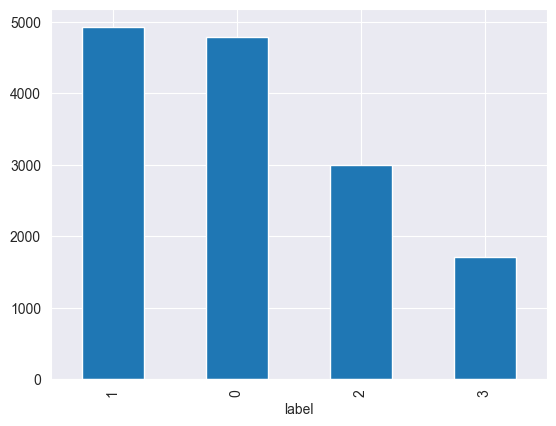

In [186]:
train.value_counts('label').plot(kind='bar')

## Export full df, train, val and test for future use

In [187]:
df.to_csv('../assets/data/df.csv', index=False)
train.to_csv('../assets/data/splits/train/raw.csv', index=False)
val.to_csv('../assets/data/splits/val/raw.csv', index=False)
test.to_csv('../assets/data/splits/test/raw.csv', index=False)